# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [74]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Import the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

### **1.1 Load the Data**

In [76]:
# Load the dataset
ed= pd.read_csv('Employee_data.csv')

In [77]:
# Check the first few entries
ed.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [78]:
# Inspect the shape of the dataset
ed.shape

(74610, 24)

In [79]:
# Inspect the different columns in the dataset
ed.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [80]:
# Check the summary of the dataset
ed.describe(include = 'all')

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74610.000000,74610.000000,74610,74610.000000,74610,74610.000000,74610,74610,74610,74610.000000,...,74610.000000,74610,74610,72197.000000,74610,74610,74610,74610,74610,74610
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Entry,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,40898,NaN,19350,NaN,28196,37306,44786,NaN,...,NaN,29820,37281,NaN,60390,70952,62486,37241,29654,39191
mean,37246.028696,38.529379,NaN,15.722638,NaN,7344.931417,NaN,NaN,NaN,0.832958,...,1.657432,NaN,NaN,55.711899,NaN,NaN,NaN,NaN,NaN,NaN
std,21505.785344,12.082299,NaN,11.224059,NaN,2596.373589,NaN,NaN,NaN,0.995326,...,1.579862,NaN,NaN,25.392325,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,1.000000,NaN,1226.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18624.250000,28.000000,NaN,7.000000,NaN,5652.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37239.500000,39.000000,NaN,13.000000,NaN,7348.500000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55871.750000,49.000000,NaN,23.000000,NaN,8876.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN


### **1.3 Check the data type of columns**

In [81]:
# Check the info to see the types of the feature variables and the null values present
ed.info()
ed.isna().any().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

True

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [82]:
# Check the number of missing values in each column
ed.isnull().sum() #Distance from Home has 1912 missing values,Company Tenure (In Months) has 2413 missing values

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [83]:
# Check the percentage of missing values in each column
round(ed.isnull().sum()/len(ed)*100)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            3.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    3.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [84]:
# Handle the missing value rows in the column
ed['Distance from Home']=ed['Distance from Home'].fillna(ed['Distance from Home'].mean())
ed['Company Tenure (In Months)'] =ed['Company Tenure (In Months)'].fillna(ed['Company Tenure (In Months)'].mean())


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [85]:
# Check the percentage of remaining data after missing values are removed
ed.isnull().sum()

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [86]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_redundant_categorical_values(ed, threshold=0.9):
    """
    Displays categorical columns, their unique value counts,
    and flags columns where a single value dominates based on a threshold.
    """
    cat_cols = ed.select_dtypes(include='object').columns.tolist()
    print(f"Found {len(cat_cols)} categorical columns.\n")
    
    for col in cat_cols:
        print(f"\n--- Column: {col} ---")
        original_vals = ed[col].value_counts(dropna=False)
        print("Unique value counts:")
        print(original_vals)
        
        # Calculate proportion of top category
        top_prop = original_vals.iloc[0] / len(ed)
        
        if top_prop > threshold:
            print(f"{col}' is dominated by a single value: '{original_vals.index[0]}' ({top_prop:.2%})")
        

In [87]:
# Check the data
check_redundant_categorical_values(ed)

Found 16 categorical columns.


--- Column: Gender ---
Unique value counts:
Gender
Male      40898
Female    33712
Name: count, dtype: int64

--- Column: Job Role ---
Unique value counts:
Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64

--- Column: Work-Life Balance ---
Unique value counts:
Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64

--- Column: Job Satisfaction ---
Unique value counts:
Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64

--- Column: Performance Rating ---
Unique value counts:
Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64

--- Column: Overtime ---
Unique value counts:
Overtime
No     50230
Yes    24380
Name: count, dtype: int64

--- Column: Education Le

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [88]:
# Drop redundant columns which are not required for modelling
ed.drop(columns=['Years at Company'], inplace=True) #No redundant columns found but we are dropped Years at Company as no use of 


In [89]:
# Check first few rows of data
ed.shape

(74610, 23)

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [90]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [91]:
# Put all the feature variables in X
X = ed.drop(columns=['Attrition'])
# Put the target variable in y
y = ed['Attrition'].replace({'Stayed': 0, 'Left': 1})

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [92]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (59688, 22) (59688,)
Test shape: (14922, 22) (14922,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [93]:
# Select numerical columns
numerical_cols=X_train.select_dtypes(include=['int64','float']).columns
X_train_num=X_train[numerical_cols]

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

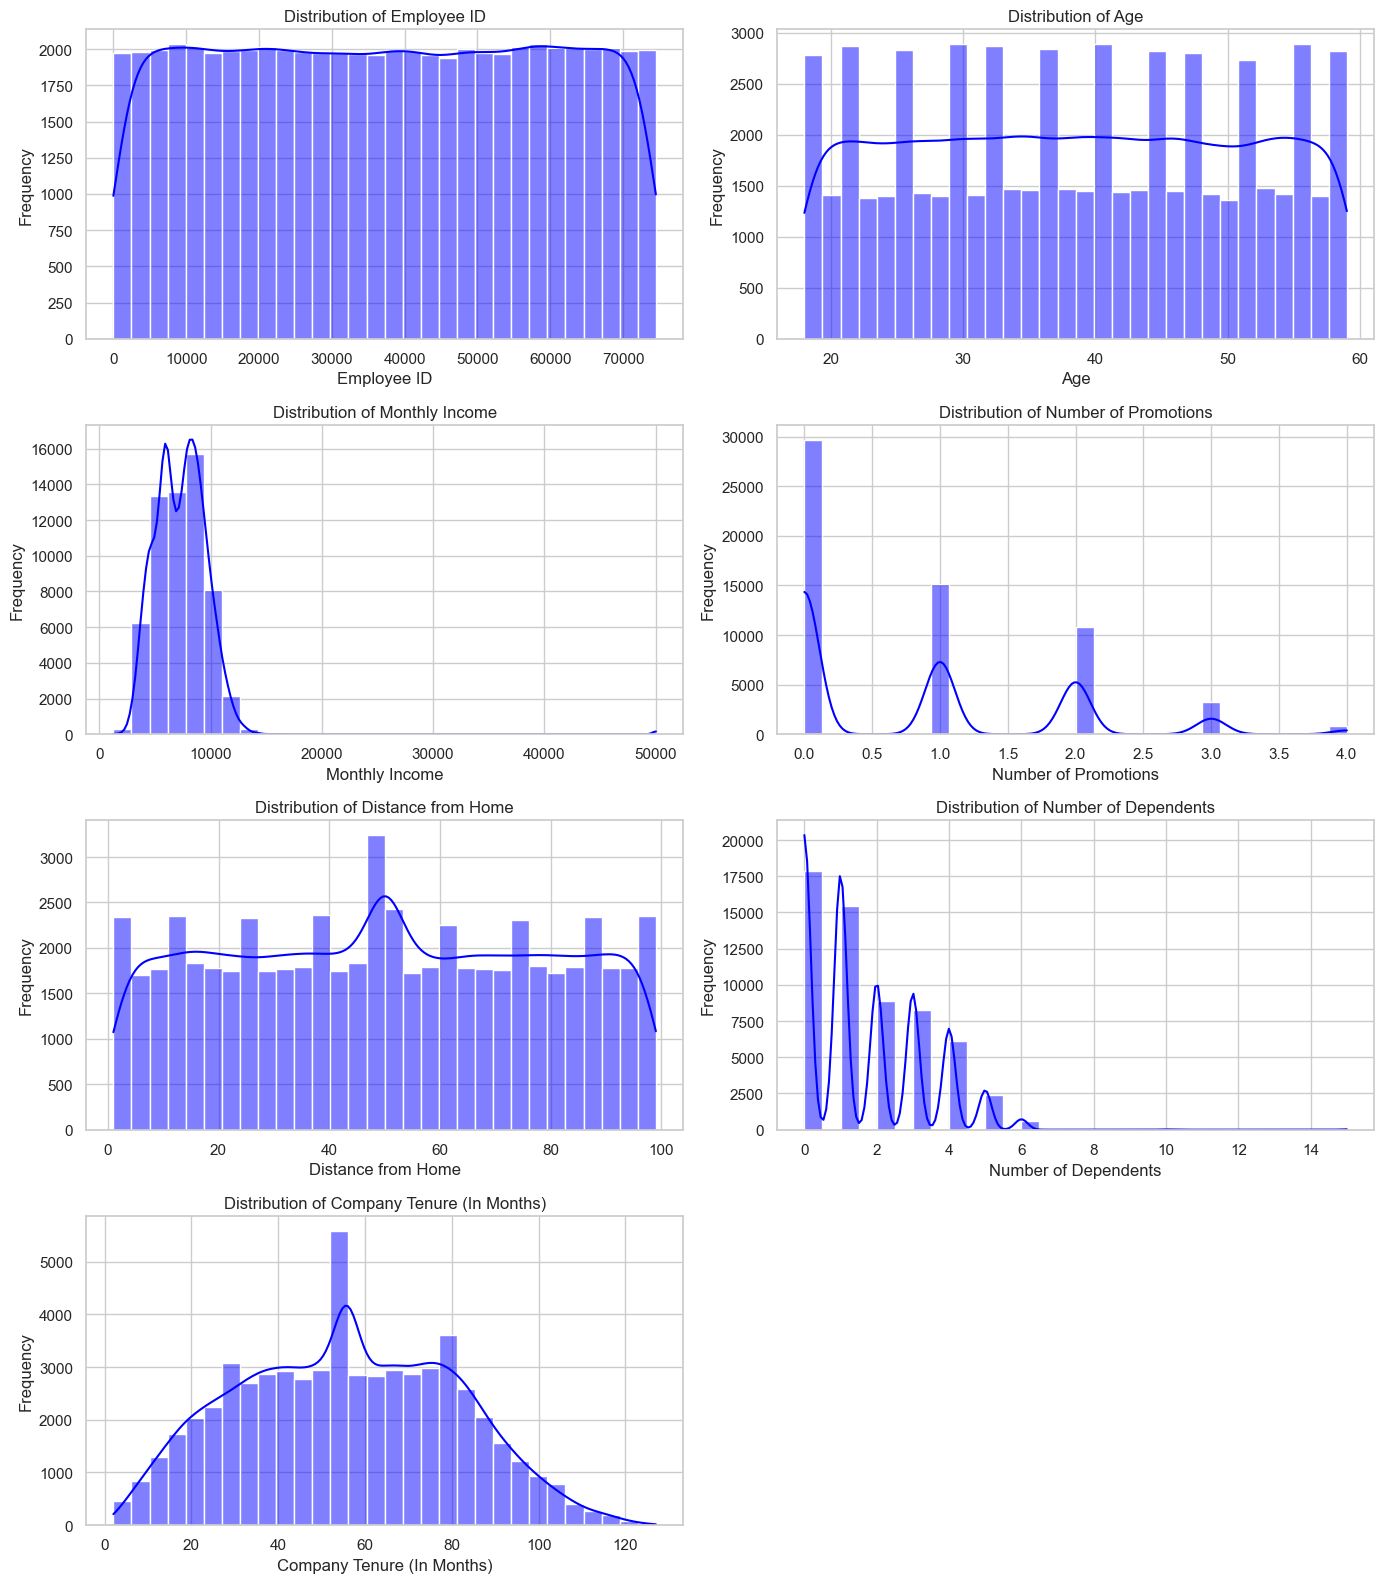

In [94]:
# Plot all the numerical columns to understand their distribution
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import math

num_cols = 2
num_rows = math.ceil(len(X_train_num.columns) / num_cols)

plt.figure(figsize=(14, num_rows * 4))
for i, col in enumerate(X_train_num.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(X_train_num[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

<Axes: >

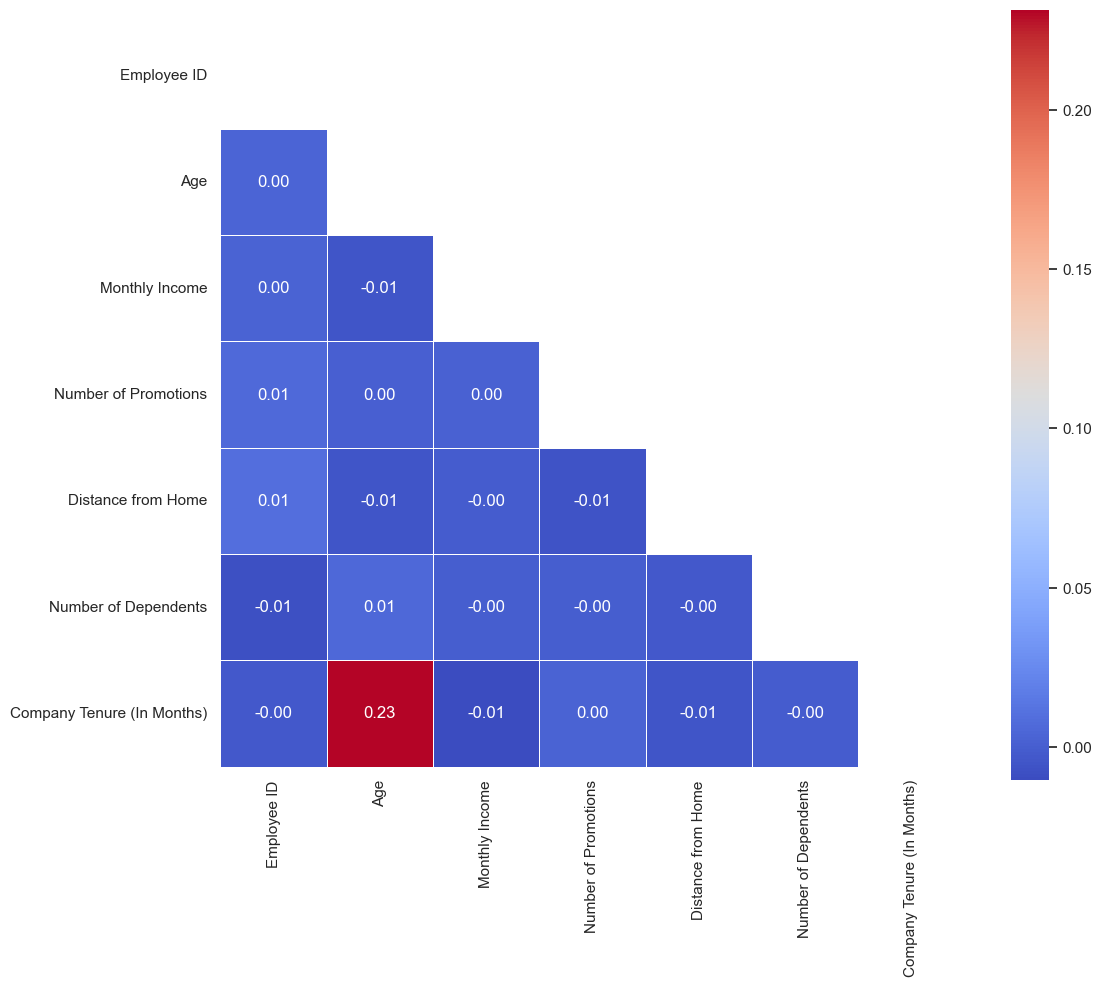

In [95]:
# Create correlation matrix for numerical columns
corr_matrix=X_train_num.corr()
plt.figure(figsize=(12,10))
sns.set(style='white')
# Plot Heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

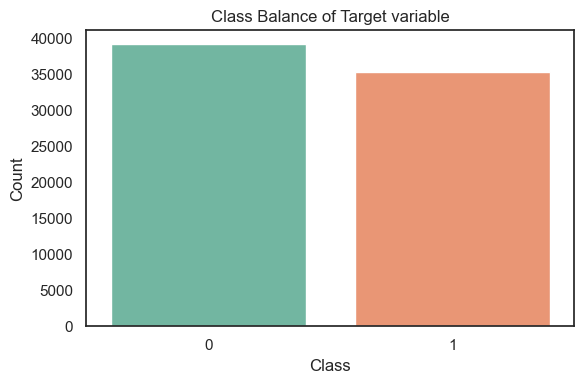

In [96]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette=sns.color_palette("Set2"))
plt.title("Class Balance of Target variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

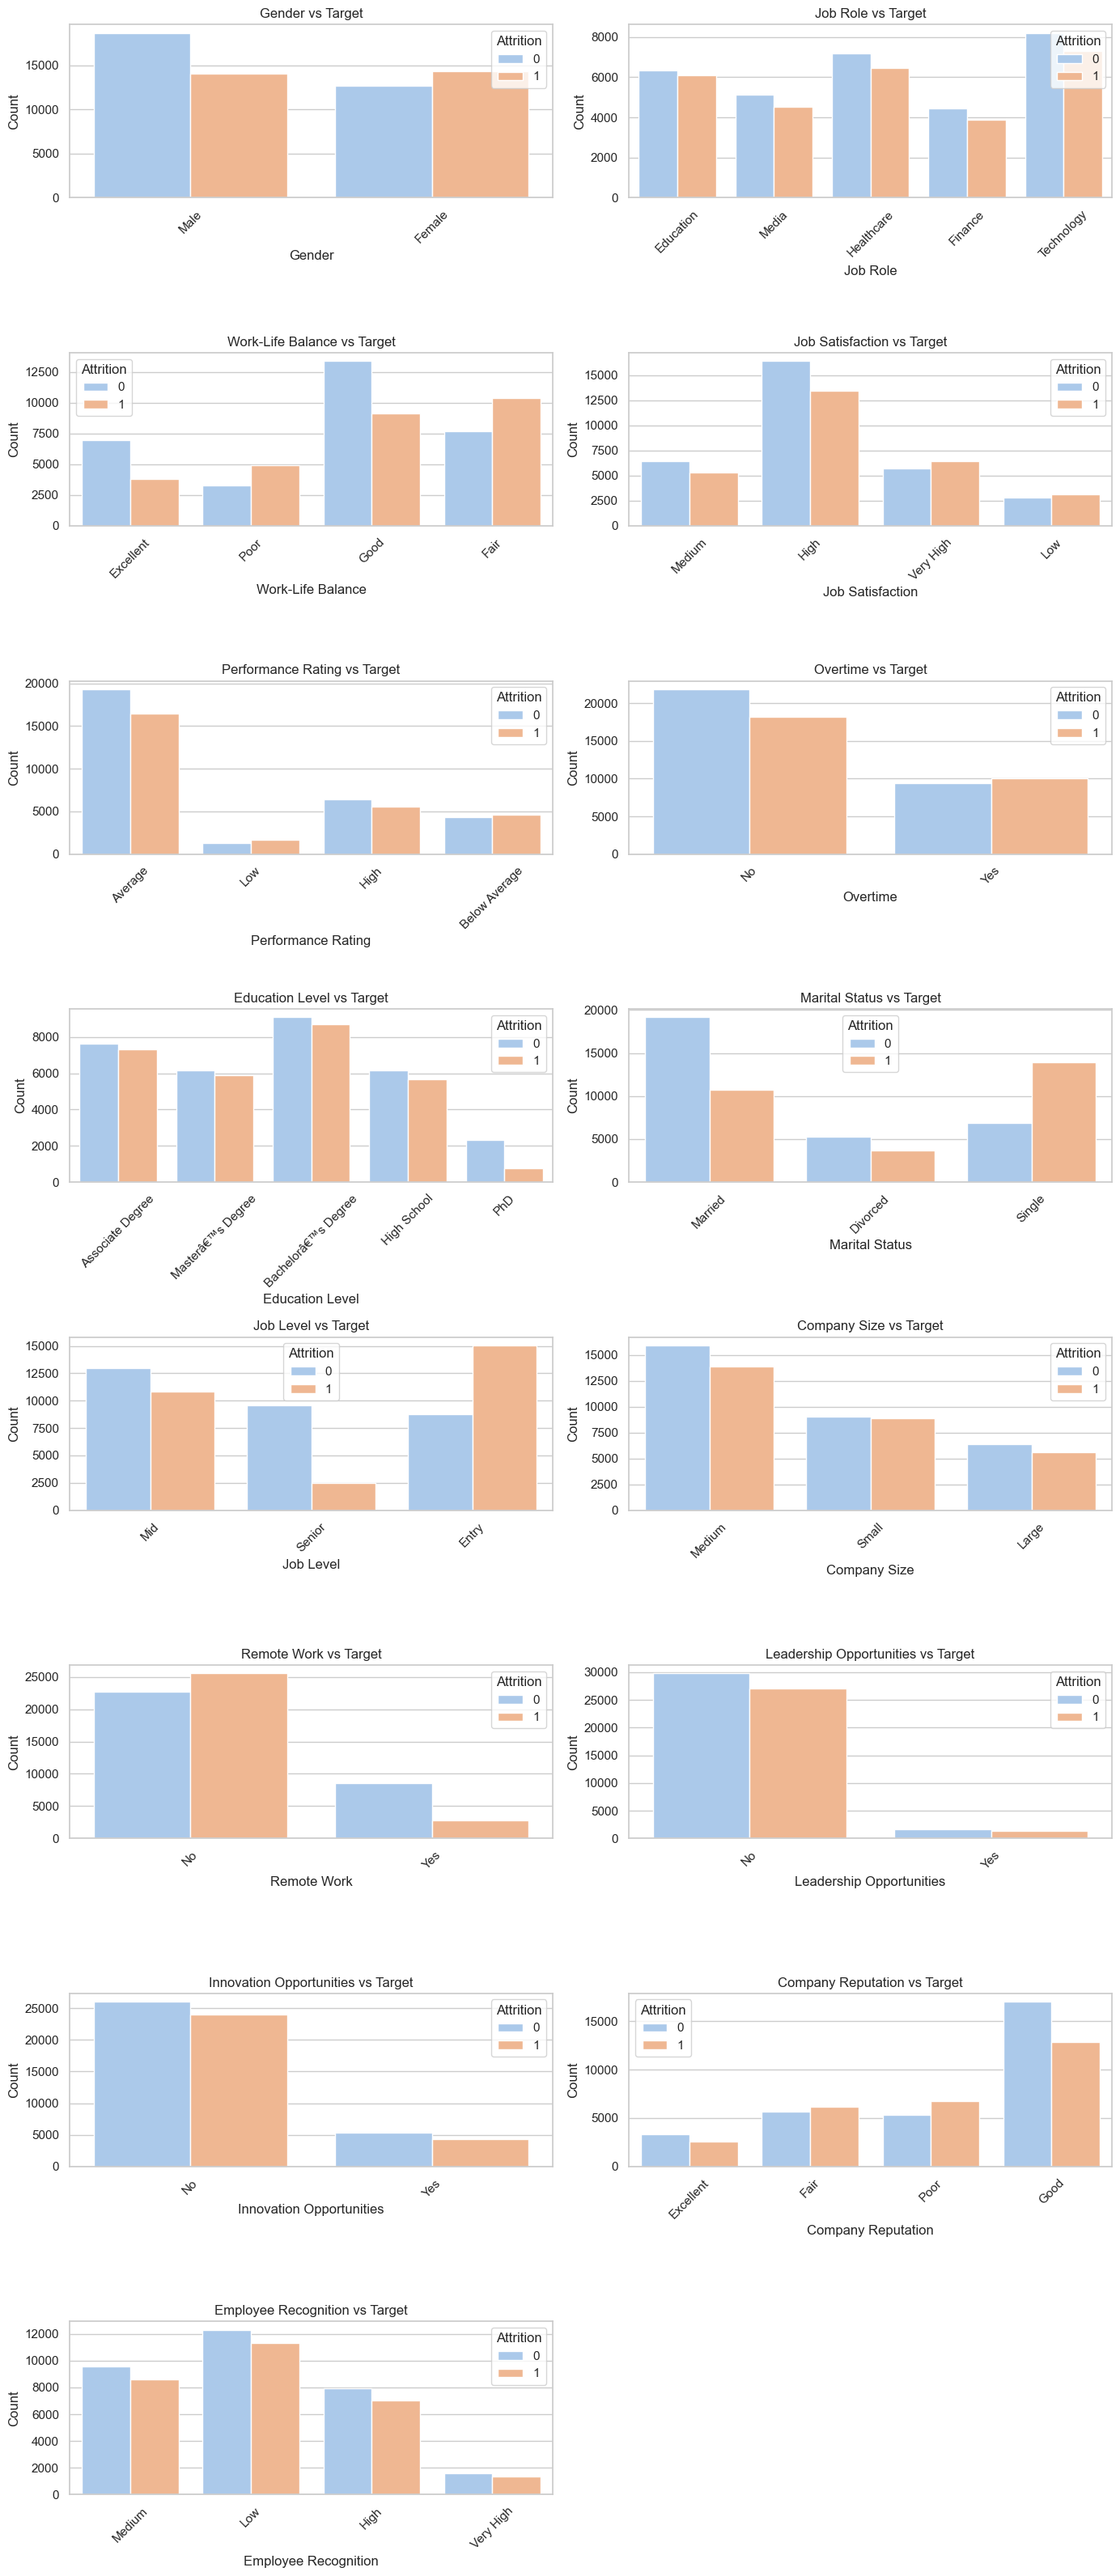

In [97]:
# Plot distribution for each categorical column with target variable
categorical_cols=X_train.select_dtypes(include='object').columns
sns.set(style="whitegrid")
num_cols=2
num_rows =(len(categorical_cols)+1)//num_cols
plt.figure(figsize=(14,num_rows*4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=X_train, x=col, hue=y, palette="pastel")
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [98]:
# Check the categorical columns
categorical_cols=X_train.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [99]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy_data = pd.get_dummies(ed[['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']])
# Add the results to the master DataFrame
master_with_dummies = pd.concat([X_train.reset_index(drop=True),dummy_data.reset_index(drop=True)], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [100]:
master_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employee ID                          59688 non-null  float64
 1   Age                                  59688 non-null  float64
 2   Gender                               59688 non-null  object 
 3   Job Role                             59688 non-null  object 
 4   Monthly Income                       59688 non-null  float64
 5   Work-Life Balance                    59688 non-null  object 
 6   Job Satisfaction                     59688 non-null  object 
 7   Performance Rating                   59688 non-null  object 
 8   Number of Promotions                 59688 non-null  float64
 9   Overtime                             59688 non-null  object 
 10  Distance from Home                   59688 non-null  float64
 11  Education Level             

In [101]:
# Drop the original categorical columns and check the DataFrame
ed_no_categoricals = X_train.drop(columns= categorical_cols)
ed_no_categoricals.head(),ed_no_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59688 entries, 7152 to 49750
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 59688 non-null  int64  
 1   Age                         59688 non-null  int64  
 2   Monthly Income              59688 non-null  int64  
 3   Number of Promotions        59688 non-null  int64  
 4   Distance from Home          59688 non-null  float64
 5   Number of Dependents        59688 non-null  int64  
 6   Company Tenure (In Months)  59688 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 5.7 MB


(       Employee ID  Age  Monthly Income  Number of Promotions  \
 7152         34720   38            4245                     0   
 38207        38724   30            4621                     1   
 51604        61481   38           10222                     0   
 59094         1325   48            4007                     1   
 15814        65644   41            6918                     4   
 
        Distance from Home  Number of Dependents  Company Tenure (In Months)  
 7152                 24.0                     4                        43.0  
 38207                38.0                     1                        21.0  
 51604                50.0                     0                        67.0  
 59094                57.0                     0                        78.0  
 15814                 2.0                     4                        75.0  ,
 None)

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [102]:
# Create dummy variables using the 'get_dummies' for independent columns
categorical_cols1=X_test.select_dtypes(include='object').columns
print("Categorical columns1:", categorical_cols1)
dummy_data1 = pd.get_dummies(ed[['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']])
# Add the results to the master DataFrame
master_with_dummies1 = pd.concat([X_test.reset_index(drop=True),dummy_data1.reset_index(drop=True)], axis=1)


Categorical columns1: Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')


Now, drop the original categorical columns and check the DataFrame

In [103]:
# Drop categorical columns and check the DataFrame
ed_no_categoricals1 = X_test.drop(columns= categorical_cols1)
ed_no_categoricals1.head(),ed_no_categoricals1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14922 entries, 52446 to 27533
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 14922 non-null  int64  
 1   Age                         14922 non-null  int64  
 2   Monthly Income              14922 non-null  int64  
 3   Number of Promotions        14922 non-null  int64  
 4   Distance from Home          14922 non-null  float64
 5   Number of Dependents        14922 non-null  int64  
 6   Company Tenure (In Months)  14922 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 932.6 KB


(       Employee ID  Age  Monthly Income  Number of Promotions  \
 52446        41709   31            7681                     0   
 66282         7681   39            6226                     2   
 18536        26697   23            4071                     1   
 17749        71461   46            5615                     0   
 35985        24089   41            4818                     2   
 
        Distance from Home  Number of Dependents  Company Tenure (In Months)  
 52446                42.0                     2                        83.0  
 66282                46.0                     1                        39.0  
 18536                84.0                     4                        72.0  
 17749                32.0                     1                        22.0  
 35985                55.0                     1                        50.0  ,
 None)

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [104]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = y_train.to_frame()
y_test_df = y_test.to_frame()

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [105]:
# Create dummy variables using the 'get_dummies' for dependent column
categorical_cols2=y_train_df.select_dtypes(include='object').columns
print("Categorical columns2:", categorical_cols2)
y_train_dummies = pd.get_dummies(ed['Attrition'])

Categorical columns2: Index([], dtype='object')


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [106]:
# Create dummy variables using the 'get_dummies' for dependent column
categorical_cols3=y_test_df.select_dtypes(include='object').columns
print("Categorical columns3:", categorical_cols3)
y_test_dummies = pd.get_dummies(ed['Attrition'])

Categorical columns3: Index([], dtype='object')


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [107]:
# Drop redundant columns from both train and validation
y_train_no_redundancy= y_train_dummies.drop_first=False
y_test_no_redundancy= y_test_dummies.drop_first=False

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [108]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [109]:
# Scale the numeric features present in the training set
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Scale the numerical features present in the validation set
numeric_features = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_test_scaled = X_test.copy()
X_test_scaled[numeric_features] = scaler.fit_transform(X_test[numeric_features])
X_train_scaled[numeric_features].head(), X_test_scaled[numeric_features].head()

(       Employee ID       Age  Monthly Income  Number of Promotions  \
 7152     -0.118526 -0.042075       -1.200047             -0.837646   
 38207     0.067354 -0.704449       -1.054614              0.169108   
 51604     1.123820 -0.042075        1.111804             -0.837646   
 59094    -1.668848  0.785892       -1.292103              0.169108   
 15814     1.317082  0.206315       -0.166154              3.189368   
 
        Distance from Home  Number of Dependents  Company Tenure (In Months)  
 7152            -0.922307              1.484066                   -0.509270  
 38207           -0.425888             -0.414924                   -1.390925  
 51604           -0.000386             -1.047921                    0.452535  
 59094            0.247823             -1.047921                    0.893363  
 15814           -1.702394              1.484066                    0.773137  ,
        Employee ID       Age  Monthly Income  Number of Promotions  \
 52446     0.213972 -0.629

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [110]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [111]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
logreg = LogisticRegression(solver='liblinear', random_state=42)
rfe_selector = RFE(estimator=logreg, n_features_to_select=15) 

In [112]:
# Display the features selected by RFE
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
scaler = StandardScaler()
X_train_scaled_all = pd.DataFrame(scaler.fit_transform(X_train_encoded),columns=X_train_encoded.columns)
rfe_selector.fit(X_train_scaled_all, y_train)
selected_features = X_train_scaled_all.columns[rfe_selector.support_].tolist()
print("Selected Features by RFE:")
for i, feature in enumerate(selected_features, 1):print(f"{i}. {feature}")

Selected Features by RFE:
1. Number of Promotions
2. Distance from Home
3. Number of Dependents
4. Gender_Male
5. Work-Life Balance_Fair
6. Work-Life Balance_Poor
7. Job Satisfaction_Very High
8. Overtime_Yes
9. Education Level_PhD
10. Marital Status_Single
11. Job Level_Mid
12. Job Level_Senior
13. Remote Work_Yes
14. Company Reputation_Fair
15. Company Reputation_Poor


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [113]:
# Put columns selected by RFE into variable 'col'
col = X_train_scaled_all.columns[rfe_selector.support_].tolist()
col

['Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Gender_Male',
 'Work-Life Balance_Fair',
 'Work-Life Balance_Poor',
 'Job Satisfaction_Very High',
 'Overtime_Yes',
 'Education Level_PhD',
 'Marital Status_Single',
 'Job Level_Mid',
 'Job Level_Senior',
 'Remote Work_Yes',
 'Company Reputation_Fair',
 'Company Reputation_Poor']

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [114]:
# Select only the columns selected by RFE
X_train_selected = X_train_scaled_all[col]

In [115]:
# View the training data
X_train_selected.head()

,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Very High,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
0,-0.837646,-0.922307,1.484066,0.908165,-0.659216,-0.401385,-0.504300,-0.697612,-0.232418,-0.732022,1.227665,-0.503019,-0.485647,-0.497129,1.983769
1,0.169108,-0.425888,-0.414924,-1.101122,1.516952,-0.401385,-0.504300,-0.697612,-0.232418,1.366079,-0.814554,1.987996,-0.485647,-0.497129,-0.504091
2,-0.837646,-0.000386,-1.047921,-1.101122,-0.659216,2.491376,1.982947,1.433462,-0.232418,-0.732022,1.227665,-0.503019,-0.485647,-0.497129,-0.504091
3,0.169108,0.247823,-1.047921,-1.101122,-0.659216,-0.401385,1.982947,1.433462,-0.232418,1.366079,-0.814554,-0.503019,-0.485647,-0.497129,-0.504091
4,3.189368,-1.702394,1.484066,0.908165,-0.659216,-0.401385,-0.504300,-0.697612,-0.232418,-0.732022,-0.814554,-0.503019,-0.485647,2.011549,-0.504091


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [116]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train_selected)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [117]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
X_train_with_const = X_train_with_const.reset_index(drop=True)
y_train_aligned = y_train.reset_index(drop=True)
logm1 = sm.GLM(y_train_aligned, X_train_with_const, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                59688
Model:                            GLM   Df Residuals:                    59672
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29548.
Date:                Mon, 21 Apr 2025   Deviance:                       59096.
Time:                        19:25:17   Pearson chi2:                 5.54e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3254
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1829      0.010    -17.781      0.000      -0.203      -0.163
Number of Promotions          -0.2458      0.010    -23.983      0.000      -0.266      -0.226
Distance from Home             0.2764      0.010     27.036      0.000       0.256       0.296
Number of Dependents          -0.2250      0.010    -21.844      0.000      -0.245      -0.205
Gender_Male                   -0.2978      0.010    -29.201      0.000      -0.318      -0.278
Work-Life Balance_Fair         0.5075      0.011     47.422      0.000       0.486       0.528
Work-Life Balance_Poor         0.4406      0.011     41.058      0.000       0.420       0.462
Job Satisfaction_Very High     0.1741      0.010     17.220      0.000       0.154       0.194
Overtime_Yes                   0.1669      0.010     16.473      0.000       0.147       0.187
Education Level_PhD           -0.3468      0.011    -30.593      0.000      -0.369      -0.325
Marital Status_Single          0.8268      0.011     75.967      0.000       0.805       0.848
Job Level_Mid                 -0.4788      0.011    -43.751      0.000      -0.500      -0.457
Job Level_Senior              -1.0314      0.013    -80.153      0.000      -1.057      -1.006
Remote Work_Yes               -0.6909      0.011    -61.038      0.000      -0.713      -0.669
Company Reputation_Fair        0.2011      0.010     19.229      0.000       0.181       0.222
Company Reputation_Poor        0.3115      0.011     29.457      0.000       0.291       0.332
==============================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [118]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Make a VIF DataFrame for all the variables present
X_for_vif = X_train_with_const.astype(float).reset_index(drop=True)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i)
                   for i in range(X_for_vif.shape[1])]

# Display VIF values
print(vif_data)

                       Feature       VIF
0                        const  1.000000
1         Number of Promotions  1.000132
2           Distance from Home  1.000429
3         Number of Dependents  1.000213
4                  Gender_Male  1.000326
5       Work-Life Balance_Fair  1.075520
6       Work-Life Balance_Poor  1.075723
7   Job Satisfaction_Very High  1.000243
8                 Overtime_Yes  1.000436
9          Education Level_PhD  1.000300
10       Marital Status_Single  1.000243
11               Job Level_Mid  1.202048
12            Job Level_Senior  1.202019
13             Remote Work_Yes  1.000221
14     Company Reputation_Fair  1.067131
15     Company Reputation_Poor  1.067252


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [120]:
# Predict the probabilities on the training set
y_train_pred_prob = result.predict(X_train_with_const)
y_train_pred_prob.head()

0    0.215499
1    0.524021
2    0.805179
3    0.935729
4    0.143081
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [121]:
# Reshape it into an array
y_train_pred_array = np.array(y_train_pred_prob).reshape(-1, 1)
y_train_pred_array.shape

(59688, 1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [122]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_results_df = pd.DataFrame({'Actual_Attrition': y_train.reset_index(drop=True),'Predicted_Probability': y_train_pred_prob})
train_results_df.head()

,Actual_Attrition,Predicted_Probability
0,1,0.215499
1,1,0.524021
2,0,0.805179
3,1,0.935729
4,0,0.143081


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [123]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_results_df['Predicted'] = (train_results_df['Predicted_Probability'] >= 0.5).astype(int)
train_results_df['Predicted'].head()

0    0
1    1
2    1
3    1
4    0
Name: Predicted, dtype: int32

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [124]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = accuracy_score(train_results_df['Actual_Attrition'], train_results_df['Predicted'])
f"Training Accuracy: {accuracy:.4f}"

'Training Accuracy: 0.7470'

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [125]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(train_results_df['Actual_Attrition'], train_results_df['Predicted'])
print(conf_matrix)

[[23946  7407]
 [ 7696 20639]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [126]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 23946
False Positives (FP): 7407
False Negatives (FN): 7696
True Positives (TP): 20639


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [127]:
# Calculate sensitivity
sensitivity = tp / float(tp+fn)
print(f"Sensitivity: {sensitivity:.4f}")

Sensitivity: 0.7284


In [128]:
# Calculate specificity
specificity= tn /(tn+fp)
print(f"specificity: {specificity:.4f}")

specificity: 0.7638


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [129]:
# Calculate precision
precision = tp /(tp + fp)
print(f"Precision: {precision:.4f}")

Precision: 0.7359


In [130]:
# Calculate recall
recall = tp /(tp + fn)
print(f"recall : {recall :.4f}")

recall : 0.7284


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

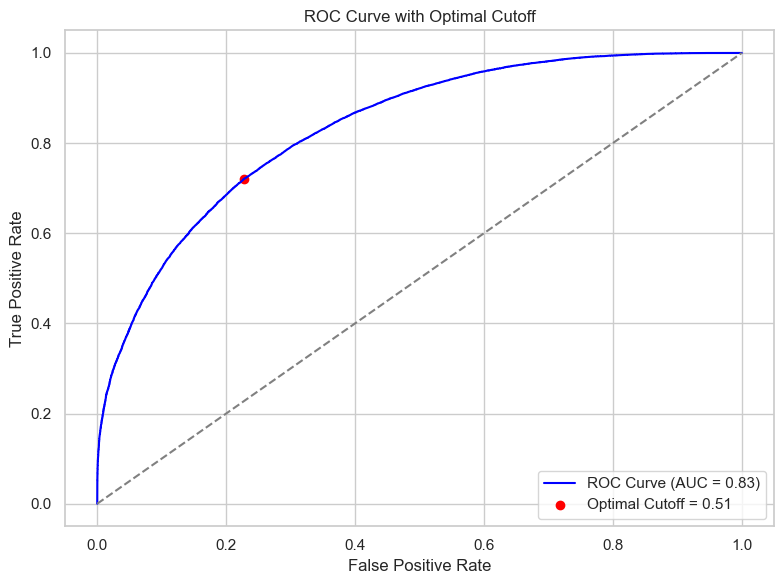

Optimal Cutoff: 0.5097


In [131]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
def plot_roc_curve(y_true, y_pred_prob):
    """
    Plots the ROC curve and calculates the AUC score.
    
    """
y_true = train_results_df['Actual_Attrition']
y_pred_prob = train_results_df['Predicted_Probability']

# Get False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
# Call the ROC function
auc_score = roc_auc_score(y_true, y_pred_prob) 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',label=f'Optimal Cutoff = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Cutoff')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Optimal Cutoff: {optimal_threshold:.4f}")


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [132]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
from sklearn.metrics import accuracy_score, confusion_matrix

def sensitivity_specificity_tradeoff(y_true, y_pred_prob, thresholds=np.arange(0, 1.01, 0.01)):
    """
    Plots Sensitivity and Specificity across a range of thresholds.
      """

prob_cutoffs = []
for thresh in thresholds:
        y_pred = (y_pred_prob >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        prob_cutoffs.append([thresh, sensitivity, specificity])  
    

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [133]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

performance_prob_cutoffs = pd.DataFrame(prob_cutoffs, columns=['Threshold', 'Sensitivity', 'Specificity'])
       
# Display the performance DataFrame
print(performance_prob_cutoffs)

       Threshold  Sensitivity  Specificity
0            inf     0.000000     1.000000
1       0.994212     0.000035     1.000000
2       0.986207     0.002541     1.000000
3       0.986197     0.002612     1.000000
4       0.983852     0.004094     1.000000
...          ...          ...          ...
23021   0.005534     1.000000     0.004242
23022   0.005513     1.000000     0.004146
23023   0.004660     1.000000     0.002743
23024   0.004643     1.000000     0.002679
23025   0.000980     1.000000     0.000000

[23026 rows x 3 columns]


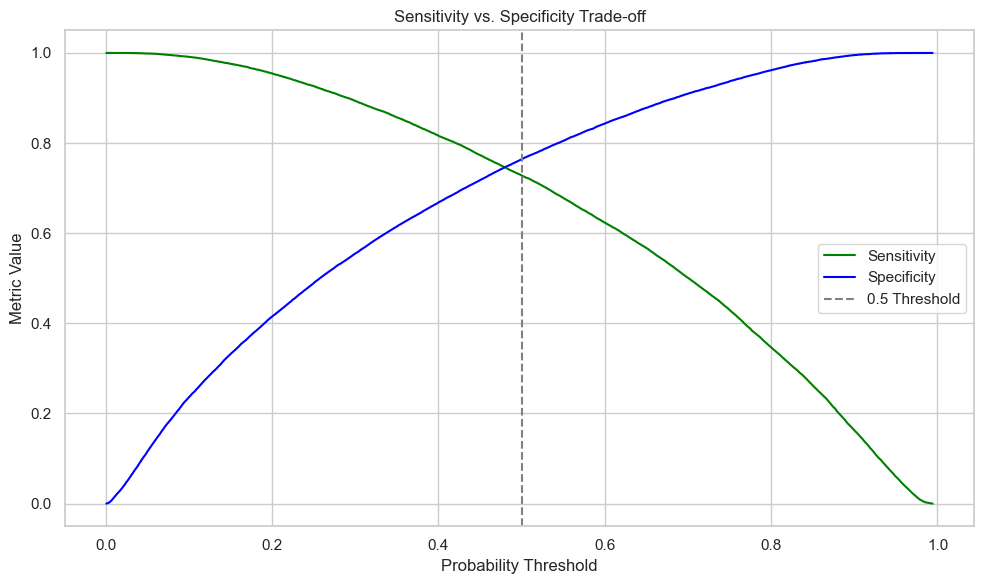

Optimal cutoff: Threshold      0.479979
Sensitivity    0.746286
Specificity    0.746244
Name: 11652, dtype: float64


In [134]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10, 6))
plt.plot(performance_prob_cutoffs['Threshold'], performance_prob_cutoffs['Sensitivity'], label='Sensitivity', color='green')
plt.plot(performance_prob_cutoffs['Threshold'], performance_prob_cutoffs['Specificity'], label='Specificity', color='blue')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity vs. Specificity Trade-off')
plt.axvline(x=0.5, color='gray', linestyle='--', label='0.5 Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
optimal_cutoff = performance_prob_cutoffs.loc[(performance_prob_cutoffs['Sensitivity'] - performance_prob_cutoffs['Specificity']).abs().idxmin()]

print(f"Optimal cutoff: {optimal_cutoff}")

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [135]:
# Create a column for final prediction based on the optimal cutoff
train_results_df['Final_Prediction'] = (train_results_df['Predicted_Probability'] >= optimal_threshold).astype(int)
print(train_results_df['Final_Prediction'].value_counts())

Final_Prediction
0    32139
1    27549
Name: count, dtype: int64


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [136]:
# Calculate the accuracy
accuracy = accuracy_score(train_results_df['Actual_Attrition'], train_results_df['Final_Prediction'])
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7479


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [137]:
# Create the confusion matrix once again
conf_matrix = confusion_matrix(train_results_df['Actual_Attrition'], train_results_df['Final_Prediction'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[24221  7132]
 [ 7918 20417]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [138]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 24221
False Positives (FP): 7132
False Negatives (FN): 7918
True Positives (TP): 20417


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [139]:
# Calculate Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

Sensitivity: 0.7206


In [140]:
# Calculate Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7725


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [141]:
# Calculate Precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")

Precision: 0.7411


In [142]:
# Calculate Recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")

Recall: 0.7206


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [143]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [144]:
# Check actual and predicted values from initial model
comparison_pred = train_results_df[['Actual_Attrition', 'Predicted']]
print(comparison_pred.head(10))

   Actual_Attrition  Predicted
0                 1          0
1                 1          1
2                 0          1
3                 1          1
4                 0          0
5                 0          1
6                 1          1
7                 1          1
8                 1          0
9                 1          1


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

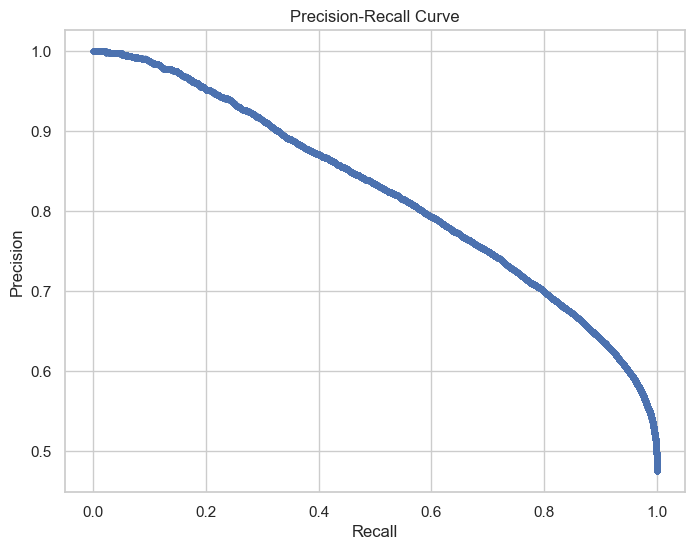

Area Under Precision-Recall Curve: 0.8219


In [145]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred_prob)#y_train is actual target values and y_train_pred_prob is predicted probablities
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color='b', label='precision-recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
from sklearn.metrics import average_precision_score
auc_pr = average_precision_score(y_train, y_train_pred_prob)
print(f'Area Under Precision-Recall Curve: {auc_pr:.4f}')

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [146]:
# Select the relevant features for validation set
import statsmodels.api as sm
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
print("Validation Set Columns:", X_test_encoded.columns)
scaler = StandardScaler()
X_test_scaled_all = pd.DataFrame(scaler.fit_transform(X_test_encoded), columns=X_test_encoded.columns)
print("First few rows of scaled validation set:")
print(X_test_scaled.head())


Validation Set Columns: Index(['Employee ID', 'Age', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fa

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [147]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test_scaled_all)
print(X_test_sm)
X_test_sm.head()

       const  Employee ID       Age  Monthly Income  Number of Promotions  \
0        1.0     0.213972 -0.629292        0.131309             -0.833867   
1        1.0    -1.378763  0.031886       -0.419870              1.159399   
2        1.0    -0.488688 -1.290471       -1.236220              0.162766   
3        1.0     1.606562  0.610417       -0.651327             -0.833867   
4        1.0    -0.610760  0.197180       -0.953244              1.159399   
...      ...          ...       ...             ...                   ...   
14917    1.0     0.433495  0.693064       -0.387670              0.162766   
14918    1.0     1.089770  1.519537       -0.098254             -0.833867   
14919    1.0    -0.310730  0.775711       -1.060070              1.159399   
14920    1.0     0.744806  1.602184        0.290412             -0.833867   
14921    1.0    -1.037168  1.519537       -0.169851             -0.833867   

       Distance from Home  Number of Dependents  Company Tenure (In Months)

,const,Employee ID,Age,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,1.0,0.213972,-0.629292,0.131309,-0.833867,-0.283061,0.211892,1.087472,-1.102687,2.462791,...,-0.654695,2.067524,-0.234374,-0.442566,-0.499225,1.010103,-0.506651,-0.821545,-0.660760,-0.226308
1,1.0,-1.378763,0.031886,-0.419870,1.159399,-0.139931,-0.420985,-0.667034,-1.102687,-0.406043,...,-0.654695,-0.483670,-0.234374,-0.442566,-0.499225,-0.989998,1.973745,-0.821545,1.513409,-0.226308
2,1.0,-0.488688,-1.290471,-1.236220,0.162766,1.219799,1.477647,0.648846,-1.102687,-0.406043,...,1.527428,-0.483670,-0.234374,-0.442566,-0.499225,-0.989998,-0.506651,-0.821545,1.513409,-0.226308
3,1.0,1.606562,0.610417,-0.651327,-0.833867,-0.640885,-0.420985,-1.344911,-1.102687,-0.406043,...,1.527428,-0.483670,-0.234374,-0.442566,2.003105,-0.989998,-0.506651,-0.821545,1.513409,-0.226308
4,1.0,-0.610760,0.197180,-0.953244,1.159399,0.182110,-0.420985,-0.228407,0.906875,-0.406043,...,-0.654695,-0.483670,-0.234374,-0.442566,-0.499225,-0.989998,1.973745,-0.821545,-0.660760,-0.226308


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [148]:
X_train_scaled_all = X_train_scaled_all.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_train_sm = sm.add_constant(X_train_scaled_all)
model = sm.Logit(y_train, X_train_sm).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.485997
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                59688
Model:                          Logit   Df Residuals:                    59646
Method:                           MLE   Df Model:                           41
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.2976
Time:                        19:27:45   Log-Likelihood:                -29008.
converged:                       True   LL-Null:                       -41296.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.1871      0.010 

In [149]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred_prob = model.predict(X_test_sm)
y_validation_pred = (y_validation_pred_prob >= optimal_threshold).astype(int)
print("First few predicted values:")
print(y_validation_pred[:20])

First few predicted values:
0     0
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    1
19    0
dtype: int32


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [150]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
y_validation_pred_prob = model.predict(X_test_sm)
y_validation_pred = (y_validation_pred_prob >= optimal_threshold).astype(int)
y_validation = y_test.reset_index(drop=True)
predicted_probability = pd.DataFrame({
    'Actual_Attrition': y_validation,
    'Predicted_Probability': y_validation_pred_prob,
    'Predicted_Label': y_validation_pred
}).reset_index(drop=True)
print(predicted_probability.head())

   Actual_Attrition  Predicted_Probability  Predicted_Label
0                 0               0.156636                0
1                 0               0.307305                0
2                 1               0.652879                1
3                 1               0.253368                0
4                 0               0.709807                1


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [151]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
predicted_probability['final_prediction'] = (predicted_probability['Predicted_Probability'] >= optimal_threshold).astype(int)

# Check the DataFrame
print(predicted_probability.head())

   Actual_Attrition  Predicted_Probability  Predicted_Label  final_prediction
0                 0               0.156636                0                 0
1                 0               0.307305                0                 0
2                 1               0.652879                1                 1
3                 1               0.253368                0                 0
4                 0               0.709807                1                 1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [152]:
# Calculate the overall accuracy
accuracy = accuracy_score(y_validation, y_validation_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7515


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [153]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_validation, y_validation_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

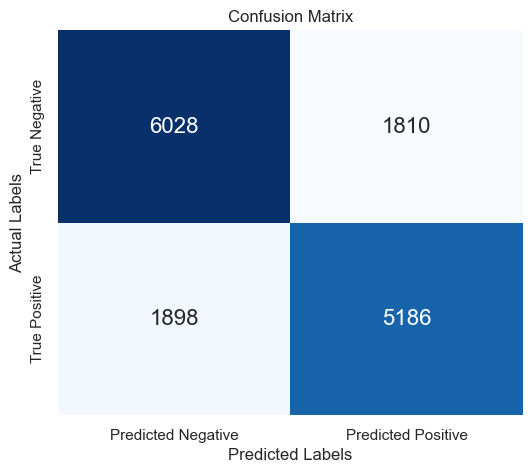

Confusion Matrix:
 [[4 1]
 [1 4]]


In [154]:
y_validation = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Actual values
y_validation_pred = [1, 0, 1, 0, 0, 1, 0, 0, 1, 1]  # Predicted values
conf_matrix = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()
print('Confusion Matrix:\n', conf_matrix)


In [155]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 4
False Positives (FP): 1
False Negatives (FN): 1
True Positives (TP): 4


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [156]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity: {sensitivity:.4f}")

Sensitivity: 0.8000


In [157]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.8000


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [158]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

Precision: 0.8000


In [159]:
# Calculate recall
recall = TP / (TP + FN)
print(f"Recall: {recall:.4f}")

Recall: 0.8000


## Conclusion

